In [1]:
conda install -c conda-forge category_encoders

Solving environment: ...working... 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2019.03=py37_0
done

## Package Plan ##

  environment location: C:\Users\lilyx\Anaconda3

  added / updated specs:
    - category_encoders


The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2019.1.23-0 --> conda-forge::ca-certificates-2019.3.9-hecc5488_0
  openssl              pkgs/main::openssl-1.1.1b-he774522_1 --> conda-forge::openssl-1.1.1b-hfa6e2cd_2

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                         pkgs/main --> conda-forge
  conda                                           pkgs/main --> conda-forge


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... failed
Rolling back transaction: ...working... done

Note

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(138): Could not remove or rename C:\Users\lilyx\Anaconda3\Library\bin\libcrypto-1_1-x64.dll.c~.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(138): Could not remove or rename C:\Users\lilyx\Anaconda3\Library\bin\libcrypto-1_1-x64.dll.  Please remove this file manually (you may need to reboot to free file handles)
ERROR conda.core.link:_execute(568): An error occurred while installing package 'conda-forge::openssl-1.1.1b-hfa6e2cd_2'.
PermissionError(13, 'Permission denied')
Attempting to roll back.

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(138): Could not remove or rename C:\Users\lilyx\Anaconda3\Library\bin\libcrypto-1_1-x64.dll.  Please remove this file manually (you may need to reboot to free file handles)

[Errno 13] Permission denied: 'C:\\Users\\lilyx\\Anaconda3\\Library\\bin\\libcrypto-1_1-x64.dll'



In [45]:
conda install eli5

Solving environment: ...working... 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2019.03=py37_0
done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import category_encoders as ce
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from mlxtend.plotting import plot_decision_regions
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# X_train = pd.read_csv('https://drive.google.com/uc?export=download&id=1Bwj7iwO2RvN3x_LZeGnY3zgTY8aQPMMC')
# y_train = pd.read_csv('https://drive.google.com/uc?export=download&id=1dxe6zLADkJwgI-i4NYjbkZFCh2ANrIhB')['status_group']
test_features = pd.read_csv('test_features.csv')
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')
sample_submission = pd.read_csv('sample_submission.csv')
X = pd.concat([train_features, test_features])
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=42)

In [60]:
# def MrClean(df):
#     df_t= df
#     df_t['gps_height'].replace(0.0, np.nan, inplace=True)
#     df_t['population'].replace(0.0, np.nan, inplace=True)
#     df_t['amount_tsh'].replace(0.0, np.nan, inplace=True)
#     df_t['gps_height'].fillna(df_t.groupby(['region', 'district_code'])['gps_height'].transform('mean'), inplace=True)
#     df_t['gps_height'].fillna(df_t.groupby(['region'])['gps_height'].transform('mean'), inplace=True)
#     df_t['gps_height'].fillna(df_t['gps_height'].mean(), inplace=True)
#     df_t['population'].fillna(df_t.groupby(['region', 'district_code'])['population'].transform('median'), inplace=True)
#     df_t['population'].fillna(df_t.groupby(['region'])['population'].transform('median'), inplace=True)
#     df_t['population'].fillna(df_t['population'].median(), inplace=True)
#     df_t['amount_tsh'].fillna(df_t.groupby(['region', 'district_code'])['amount_tsh'].transform('median'), inplace=True)
#     df_t['amount_tsh'].fillna(df_t.groupby(['region'])['amount_tsh'].transform('median'), inplace=True)
#     df_t['amount_tsh'].fillna(df_t['amount_tsh'].median(), inplace=True)
#     features=['amount_tsh', 'gps_height', 'population']
#     scaler = RobustScaler()
#     df_t[features] = scaler.fit_transform(df_t[features])
#     df_t['longitude'].replace(0.0, np.nan, inplace=True)
#     df_t['latitude'].replace(0.0, np.nan, inplace=True)
#     df_t['construction_year'].replace(0.0, np.nan, inplace=True)
#     df_t['latitude'].fillna(df_t.groupby(['region', 'district_code'])['latitude'].transform('mean'), inplace=True)
#     df_t['longitude'].fillna(df_t.groupby(['region', 'district_code'])['longitude'].transform('mean'), inplace=True)
#     df_t['longitude'].fillna(df_t.groupby(['region'])['longitude'].transform('mean'), inplace=True)
#     df_t['construction_year'].fillna(df_t.groupby(['region', 'district_code'])['construction_year'].transform('median'), inplace=True)
#     df_t['construction_year'].fillna(df_t.groupby(['region'])['construction_year'].transform('median'), inplace=True)
#     df_t['construction_year'].fillna(df_t.groupby(['district_code'])['construction_year'].transform('median'), inplace=True)
#     df_t['construction_year'].fillna(df_t['construction_year'].median(), inplace=True)
#     df_t['date_recorded'] = pd.to_datetime(df_t['date_recorded'])
#     df_t['years_service'] = df_t.date_recorded.dt.year - df_t.construction_year
   
#     garbage=['wpt_name','num_private','subvillage','region_code','recorded_by','management_group',
#          'extraction_type_group','extraction_type_class','scheme_name','payment',
#         'quality_group','quantity_group','source_type','source_class','waterpoint_type_group',
#         'ward','public_meeting','permit','date_recorded','construction_year']
#     df_t.drop(garbage,axis=1, inplace=True)
#     df_t.waterpoint_type = df_t.waterpoint_type.str.lower()
#     df_t.funder = df_t.funder.str.lower()
#     df_t.basin = df_t.basin.str.lower()
#     df_t.region = df_t.region.str.lower()
#     df_t.source = df_t.source.str.lower()
#     df_t.lga = df_t.lga.str.lower()
#     df_t.management = df_t.management.str.lower()
#     df_t.quantity = df_t.quantity.str.lower()
#     df_t.water_quality = df_t.water_quality.str.lower()
#     df_t.payment_type=df_t.payment_type.str.lower()
#     df_t.extraction_type=df_t.extraction_type.str.lower()
#     df_t["funder"].fillna("other", inplace=True)
#     df_t["scheme_management"].fillna("other", inplace=True)
#     df_t["installer"].fillna("other", inplace=True)
    
#     #further spacial/location information
#     #https://www.kaggle.com/c/sf-crime/discussion/18853
    
#     return df_t
# MrClean(X)

In [61]:
def wrangle(X):
    # Create copy of dataframe to avoid copy warning
    X = X.copy()
    
    # Some features have missing data showing as 0 that need to be changed to nan
    X['gps_height'] = X['gps_height'].replace(0.0, np.nan)
    X['longitude'] = X['longitude'].replace(0.0, np.nan)
    X['latitude'] = X['latitude'].replace(0.0, np.nan)
    X['construction_year'] = X['construction_year'].replace(0.0, np.nan)
    X['population'] = X['population'].replace(0.0, np.nan)
    X['amount_tsh'] = X['amount_tsh'].replace(0.0, np.nan)
    
    # gps_height: replace nan values with the mean of the smallest geographical region possible
    # Excluding subvillage due to missing values
    X['gps_height'].fillna(X.groupby(['ward'])['gps_height'].transform('mean'), inplace=True)
    X['gps_height'].fillna(X.groupby(['district_code'])['gps_height'].transform('mean'), inplace=True)
    X['gps_height'].fillna(X.groupby(['region_code'])['gps_height'].transform('mean'), inplace=True)
    X['gps_height'].fillna(X['gps_height'].mean(), inplace=True)
    
    # longitude: replace nan values with the mean of the smallest geographical region possible
    # Excluding subvillage due to missing values
    X['longitude'].fillna(X.groupby(['ward'])['longitude'].transform('mean'), inplace=True)
    X['longitude'].fillna(X.groupby(['district_code'])['longitude'].transform('mean'), inplace=True)
    X['longitude'].fillna(X.groupby(['region_code'])['longitude'].transform('mean'), inplace=True)
    X['longitude'].fillna(X['longitude'].mean(), inplace=True)
    
    # latitude: replace nan values with the mean of the smallest geographical region possible
    # Excluding subvillage due to missing values
    X['latitude'].fillna(X.groupby(['ward'])['latitude'].transform('mean'), inplace=True)
    X['latitude'].fillna(X.groupby(['district_code'])['latitude'].transform('mean'), inplace=True)
    X['latitude'].fillna(X.groupby(['region_code'])['latitude'].transform('mean'), inplace=True)
    X['latitude'].fillna(X['latitude'].mean(), inplace=True)
    
    # population: replace nan values with the mean of the smallest geographical region possible
    # Excluding subvillage due to missing values
    X['population'].fillna(X.groupby(['ward'])['population'].transform('median'), inplace=True)
    X['population'].fillna(X.groupby(['district_code'])['population'].transform('median'), inplace=True)
    X['population'].fillna(X.groupby(['region_code'])['population'].transform('median'), inplace=True)
    X['population'].fillna(X['population'].median(), inplace=True)
    
    # population: replace nan values with the mean of the smallest geographical region possible
    # Excluding subvillage due to missing values
    X['amount_tsh'].fillna(X.groupby(['ward'])['amount_tsh'].transform('median'), inplace=True)
    X['amount_tsh'].fillna(X.groupby(['district_code'])['amount_tsh'].transform('median'), inplace=True)
    X['amount_tsh'].fillna(X.groupby(['region_code'])['amount_tsh'].transform('median'), inplace=True)
    X['amount_tsh'].fillna(X['amount_tsh'].median(), inplace=True)
    
    # construction_year: replace nan values with the mean of the smallest geographical region possible
    # Excluding subvillage due to missing values
    X['construction_year'].fillna(X.groupby(['ward'])['construction_year'].transform('median'), inplace=True)
    X['construction_year'].fillna(X.groupby(['district_code'])['construction_year'].transform('median'), inplace=True)
    X['construction_year'].fillna(X.groupby(['region_code'])['construction_year'].transform('median'), inplace=True)
    X['construction_year'].fillna(X['construction_year'].median(), inplace=True)
    
    # Convert date to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract datetime data
    X['year_recorded'] = X['date_recorded'].dt.year
    
    # Drop duplicate or unnecessary features
    X = X.drop(columns=['recorded_by', 'quantity_group', 'date_recorded', 'wpt_name', 'num_private', 'subvillage',
                       'region_code', 'management_group', 'extraction_type_group', 'extraction_type_class',
                       'scheme_name', 'payment', 'water_quality', 'source_type', 'source_class', 'waterpoint_type_group',
                       'ward', 'public_meeting', 'permit'])
    
    # Several categorical features have values showing as '0'
    # Replace '0' with nan
    categoricals = X.select_dtypes(exclude='number').columns.tolist()
    X[categoricals] = X[categoricals].replace('0', np.nan)
    
    # Convert to lowercase to collapse duplicates
    X['waterpoint_type'] = X['waterpoint_type'].str.lower()
    X['funder'] = X['funder'].str.lower()
    X['basin'] = X['basin'].str.lower()
    X['region'] = X['region'].str.lower()
    X['source'] = X['source'].str.lower()
    X['lga'] = X['lga'].str.lower()
    X['management'] = X['management'].str.lower()
    X['quantity'] = X['quantity'].str.lower()
    X['quality_group'] = X['quality_group'].str.lower()
    X['payment_type'] = X['payment_type'].str.lower()
    X['extraction_type'] = X['extraction_type'].str.lower()
    
    # Replace nan values with 'other'
    X["funder"].fillna("other", inplace=True)
    X["scheme_management"].fillna("other", inplace=True)
    X["installer"].fillna("other", inplace=True)
    
    # Replace any remaining nan values with 'other'
    X = X.replace(np.nan, 'other')
    
    return X

wrangle(X)

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,district_code,...,scheme_management,construction_year,extraction_type,management,payment_type,quality_group,quantity,source,waterpoint_type,year_recorded
0,69572,6000.0,roman,1390.000000,Roman,34.938093,-9.856322e+00,lake nyasa,iringa,5,...,VWC,1999.0,gravity,vwc,annually,good,enough,spring,communal standpipe,2011
1,8776,500.0,grumeti,1399.000000,GRUMETI,34.698766,-2.147466e+00,lake victoria,mara,2,...,Other,2010.0,gravity,wug,never pay,good,insufficient,rainwater harvesting,communal standpipe,2013
2,34310,25.0,lottery club,686.000000,World vision,37.460664,-3.821329e+00,pangani,manyara,4,...,VWC,2009.0,gravity,vwc,per bucket,good,enough,dam,communal standpipe multiple,2013
3,67743,50.0,unicef,263.000000,UNICEF,38.486161,-1.115530e+01,ruvuma / southern coast,mtwara,63,...,VWC,1986.0,submersible,vwc,never pay,good,dry,machine dbh,communal standpipe multiple,2013
4,19728,300.0,action in a,991.705377,Artisan,31.130847,-1.825359e+00,lake victoria,kagera,1,...,other,2000.0,gravity,other,never pay,good,seasonal,rainwater harvesting,communal standpipe,2011
5,9944,20.0,mkinga distric coun,1248.501075,DWE,39.172796,-4.765587e+00,pangani,tanga,8,...,VWC,2009.0,submersible,vwc,per bucket,salty,enough,other,communal standpipe multiple,2011
6,19816,500.0,dwsp,973.738005,DWSP,33.362410,-3.766365e+00,internal,shinyanga,3,...,VWC,1999.0,swn 80,vwc,never pay,good,enough,machine dbh,hand pump,2012
7,54551,500.0,rwssp,973.738005,DWE,32.620617,-4.226198e+00,lake tanganyika,shinyanga,3,...,other,1999.0,nira/tanira,wug,unknown,milky,enough,shallow well,hand pump,2012
8,53934,200.0,wateraid,795.395550,Water Aid,32.711100,-5.146712e+00,lake tanganyika,tabora,6,...,VWC,2000.5,india mark ii,vwc,never pay,salty,seasonal,machine dbh,hand pump,2012
9,46144,300.0,isingiro ho,991.705377,Artisan,30.626991,-1.257051e+00,lake victoria,kagera,1,...,other,2000.0,nira/tanira,vwc,never pay,good,enough,shallow well,hand pump,2011


In [62]:
X.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,73758,1,GeoData Consultants Ltd,73758
public_meeting,69639,2,True,63319
permit,70039,2,True,48294
source_class,73758,3,groundwater,56921
management_group,73758,5,user-group,65129
quantity_group,73758,5,enough,41183
quantity,73758,5,enough,41183
waterpoint_type_group,73758,6,communal standpipe,42885
quality_group,73758,6,good,63055
payment_type,73758,7,never pay,31446


In [63]:
X.shape

(73758, 40)

In [64]:
X = X.drop(columns = ['lga', 'date_recorded', 'ward', 'funder', 'installer', 'scheme_name', 'subvillage','wpt_name'])
encoder = ce.OneHotEncoder(use_cat_names=True)
X = encoder.fit_transform(X)

In [65]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [70]:
y_train = train_labels.iloc[:30000]
y_train = y_train['status_group']
y_train = pd.Series(np.where(y_train.values == 'functional', 1, 0),
              y_train.index)
y_val = train_labels.iloc[30000:59400]
y_val = y_val['status_group']
y_val = pd.Series(np.where(y_val.values == 'functional', 1, 0),
              y_val.index)
X_train = X.iloc[:30000]
X_val = X.iloc[30000:59400]
X_test = X.iloc[59400:]

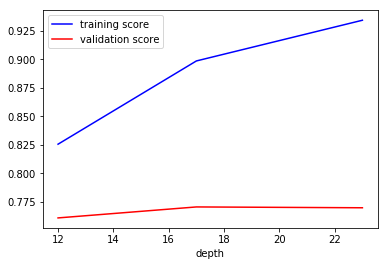

In [33]:
from xgboost import XGBClassifier
from scipy.stats import randint
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier


model = XGBClassifier(n_estimators=3)

depth = [12,17,23]#try a variety of parameters for model
train_score, val_score = validation_curve(
    model, X_train, y_train,
    param_name='max_depth', param_range=depth, 
    scoring='accuracy', cv=3)

plt.plot(depth, np.median(train_score, 1), color='blue', label='training score')
plt.plot(depth, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('depth');

In [35]:
from sklearn.model_selection import RandomizedSearchCV


param_distributions = {
    'n_estimators': randint(3,10), 
    'max_depth': [17]
}

# n_iter & cv parameters are low here so the example runs faster
search = RandomizedSearchCV(
    estimator=XGBClassifier(n_jobs=-1, random_state=42), 
    param_distributions=param_distributions, 
    n_iter=10, 
    scoring='accuracy', 
    n_jobs=-1, 
    cv=2, 
    verbose=10, 
    return_train_score=True, 
    random_state=42
)

search.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:   17.7s remaining:   26.5s
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:   24.0s remaining:   19.6s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:   28.1s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:   30.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   31.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   31.3s finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B0001E6198>, 'max_depth': [17]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='accuracy', verbose=10)

In [37]:
y_pred = search.predict(X_val)
y_pred

array(['functional', 'non functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [38]:
accuracy_score(y_val, y_pred)

0.7809183673469388

In [39]:
y_pred = search.predict(X_test)
y_pred

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [40]:
len(y_pred)

14358

In [41]:
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('lilysu-tanzania-submission-012.csv', index=False)

In [43]:
df = pd.read_csv('lilysu-tanzania-submission-012.csv')
df.head(10)

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
5,52449,functional
6,24806,functional
7,28965,non functional
8,36301,non functional
9,54122,functional


In [67]:
X_val.head(1)

,id,amount_tsh,gps_height,longitude,latitude,num_private,basin_Lake Nyasa,basin_Lake Victoria,basin_Pangani,basin_Ruvuma / Southern Coast,...,waterpoint_type_other,waterpoint_type_improved spring,waterpoint_type_cattle trough,waterpoint_type_dam,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_other,waterpoint_type_group_improved spring,waterpoint_type_group_cattle trough,waterpoint_type_group_dam
30000,-0.640507,0.0,1.179195,0.051161,-0.644008,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0


In [68]:
y_val.head(1)

30000    functional
Name: status_group, dtype: object

In [56]:
import eli5
from eli5.sklearn import PermutationImportance


permuter = PermutationImportance(search, scoring='accuracy', cv='prefit', n_iter=2, random_state=42)#instantiate permuter object

permuter.fit(X_val.values, y_val)

ValueError: feature_names mismatch: ['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'basin_Lake Nyasa', 'basin_Lake Victoria', 'basin_Pangani', 'basin_Ruvuma / Southern Coast', 'basin_Internal', 'basin_Lake Tanganyika', 'basin_Wami / Ruvu', 'basin_Rufiji', 'basin_Lake Rukwa', 'region_Iringa', 'region_Mara', 'region_Manyara', 'region_Mtwara', 'region_Kagera', 'region_Tanga', 'region_Shinyanga', 'region_Tabora', 'region_Pwani', 'region_Ruvuma', 'region_Kilimanjaro', 'region_Rukwa', 'region_Mwanza', 'region_Kigoma', 'region_Lindi', 'region_Dodoma', 'region_Arusha', 'region_Mbeya', 'region_Singida', 'region_Morogoro', 'region_Dar es Salaam', 'region_code', 'district_code', 'population', 'public_meeting_True', 'public_meeting_nan', 'public_meeting_False', 'recorded_by_GeoData Consultants Ltd', 'scheme_management_VWC', 'scheme_management_Other', 'scheme_management_nan', 'scheme_management_Private operator', 'scheme_management_WUG', 'scheme_management_Water Board', 'scheme_management_WUA', 'scheme_management_Water authority', 'scheme_management_Company', 'scheme_management_Parastatal', 'scheme_management_Trust', 'scheme_management_SWC', 'scheme_management_None', 'permit_False', 'permit_True', 'permit_nan', 'construction_year', 'extraction_type_gravity', 'extraction_type_submersible', 'extraction_type_swn 80', 'extraction_type_nira/tanira', 'extraction_type_india mark ii', 'extraction_type_other', 'extraction_type_ksb', 'extraction_type_mono', 'extraction_type_windmill', 'extraction_type_afridev', 'extraction_type_other - rope pump', 'extraction_type_india mark iii', 'extraction_type_other - swn 81', 'extraction_type_other - play pump', 'extraction_type_cemo', 'extraction_type_climax', 'extraction_type_walimi', 'extraction_type_other - mkulima/shinyanga', 'extraction_type_group_gravity', 'extraction_type_group_submersible', 'extraction_type_group_swn 80', 'extraction_type_group_nira/tanira', 'extraction_type_group_india mark ii', 'extraction_type_group_other', 'extraction_type_group_mono', 'extraction_type_group_wind-powered', 'extraction_type_group_afridev', 'extraction_type_group_rope pump', 'extraction_type_group_india mark iii', 'extraction_type_group_other handpump', 'extraction_type_group_other motorpump', 'extraction_type_class_gravity', 'extraction_type_class_submersible', 'extraction_type_class_handpump', 'extraction_type_class_other', 'extraction_type_class_motorpump', 'extraction_type_class_wind-powered', 'extraction_type_class_rope pump', 'management_vwc', 'management_wug', 'management_other', 'management_private operator', 'management_water board', 'management_wua', 'management_company', 'management_water authority', 'management_parastatal', 'management_unknown', 'management_other - school', 'management_trust', 'management_group_user-group', 'management_group_other', 'management_group_commercial', 'management_group_parastatal', 'management_group_unknown', 'payment_pay annually', 'payment_never pay', 'payment_pay per bucket', 'payment_unknown', 'payment_pay when scheme fails', 'payment_other', 'payment_pay monthly', 'payment_type_annually', 'payment_type_never pay', 'payment_type_per bucket', 'payment_type_unknown', 'payment_type_on failure', 'payment_type_other', 'payment_type_monthly', 'water_quality_soft', 'water_quality_salty', 'water_quality_milky', 'water_quality_unknown', 'water_quality_fluoride', 'water_quality_coloured', 'water_quality_salty abandoned', 'water_quality_fluoride abandoned', 'quality_group_good', 'quality_group_salty', 'quality_group_milky', 'quality_group_unknown', 'quality_group_fluoride', 'quality_group_colored', 'quantity_enough', 'quantity_insufficient', 'quantity_dry', 'quantity_seasonal', 'quantity_unknown', 'quantity_group_enough', 'quantity_group_insufficient', 'quantity_group_dry', 'quantity_group_seasonal', 'quantity_group_unknown', 'source_spring', 'source_rainwater harvesting', 'source_dam', 'source_machine dbh', 'source_other', 'source_shallow well', 'source_river', 'source_hand dtw', 'source_lake', 'source_unknown', 'source_type_spring', 'source_type_rainwater harvesting', 'source_type_dam', 'source_type_borehole', 'source_type_other', 'source_type_shallow well', 'source_type_river/lake', 'source_class_groundwater', 'source_class_surface', 'source_class_unknown', 'waterpoint_type_communal standpipe', 'waterpoint_type_communal standpipe multiple', 'waterpoint_type_hand pump', 'waterpoint_type_other', 'waterpoint_type_improved spring', 'waterpoint_type_cattle trough', 'waterpoint_type_dam', 'waterpoint_type_group_communal standpipe', 'waterpoint_type_group_hand pump', 'waterpoint_type_group_other', 'waterpoint_type_group_improved spring', 'waterpoint_type_group_cattle trough', 'waterpoint_type_group_dam'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185']
expected extraction_type_class_rope pump, extraction_type_cemo, water_quality_fluoride, longitude, region_Lindi, extraction_type_climax, payment_type_never pay, water_quality_unknown, source_shallow well, source_type_borehole, extraction_type_group_afridev, water_quality_milky, basin_Lake Victoria, basin_Lake Nyasa, population, management_group_parastatal, extraction_type_swn 80, waterpoint_type_cattle trough, public_meeting_nan, region_Singida, scheme_management_WUA, extraction_type_india mark iii, source_type_dam, management_other - school, waterpoint_type_other, extraction_type_group_submersible, basin_Internal, source_dam, quantity_unknown, management_other, scheme_management_SWC, quantity_group_dry, extraction_type_nira/tanira, extraction_type_group_india mark iii, extraction_type_mono, region_Kigoma, payment_pay annually, basin_Ruvuma / Southern Coast, extraction_type_group_other motorpump, water_quality_salty, region_Iringa, region_Kilimanjaro, scheme_management_Private operator, quality_group_milky, permit_nan, water_quality_salty abandoned, source_type_spring, waterpoint_type_group_improved spring, management_private operator, source_rainwater harvesting, extraction_type_group_swn 80, payment_never pay, source_other, scheme_management_WUG, public_meeting_True, permit_True, quantity_seasonal, waterpoint_type_communal standpipe, gps_height, recorded_by_GeoData Consultants Ltd, management_water board, waterpoint_type_hand pump, region_Mtwara, water_quality_soft, waterpoint_type_group_other, scheme_management_Company, quality_group_fluoride, quantity_group_unknown, management_water authority, extraction_type_other - mkulima/shinyanga, region_Mwanza, scheme_management_Water authority, basin_Pangani, extraction_type_group_nira/tanira, extraction_type_group_india mark ii, public_meeting_False, extraction_type_group_wind-powered, management_unknown, waterpoint_type_group_cattle trough, source_type_shallow well, region_Morogoro, extraction_type_class_handpump, extraction_type_group_other handpump, region_Rukwa, source_spring, waterpoint_type_dam, management_wug, amount_tsh, scheme_management_Water Board, region_Kagera, extraction_type_class_wind-powered, scheme_management_nan, extraction_type_walimi, waterpoint_type_group_communal standpipe, basin_Rufiji, quality_group_unknown, quality_group_salty, source_type_river/lake, region_Dodoma, payment_type_on failure, quantity_insufficient, waterpoint_type_group_hand pump, source_river, extraction_type_class_motorpump, source_type_rainwater harvesting, management_vwc, source_type_other, extraction_type_afridev, scheme_management_None, management_parastatal, region_Mbeya, extraction_type_submersible, district_code, water_quality_coloured, id, source_machine dbh, quantity_group_insufficient, management_company, payment_type_unknown, source_unknown, management_group_other, region_Dar es Salaam, payment_pay per bucket, basin_Lake Rukwa, extraction_type_group_rope pump, extraction_type_class_other, quantity_group_enough, payment_pay monthly, region_Shinyanga, extraction_type_gravity, extraction_type_group_mono, source_lake, quantity_dry, extraction_type_class_gravity, construction_year, region_code, extraction_type_other, quality_group_good, region_Mara, extraction_type_india mark ii, management_group_unknown, region_Tabora, quality_group_colored, source_class_surface, scheme_management_Parastatal, payment_unknown, extraction_type_class_submersible, latitude, basin_Wami / Ruvu, region_Ruvuma, payment_other, waterpoint_type_group_dam, extraction_type_ksb, extraction_type_other - swn 81, region_Pwani, scheme_management_Trust, waterpoint_type_communal standpipe multiple, scheme_management_VWC, extraction_type_other - play pump, management_group_user-group, source_class_groundwater, region_Tanga, waterpoint_type_improved spring, management_group_commercial, basin_Lake Tanganyika, scheme_management_Other, source_hand dtw, management_trust, source_class_unknown, extraction_type_windmill, payment_type_annually, extraction_type_group_gravity, payment_pay when scheme fails, management_wua, permit_False, payment_type_monthly, payment_type_other, quantity_group_seasonal, extraction_type_group_other, num_private, region_Manyara, water_quality_fluoride abandoned, quantity_enough, extraction_type_other - rope pump, payment_type_per bucket, region_Arusha in input data
training data did not have the following fields: f4, f2, f85, f136, f161, f116, f126, f41, f109, f7, f16, f160, f3, f82, f50, f118, f157, f154, f152, f73, f42, f120, f181, f117, f177, f184, f49, f1, f103, f170, f75, f112, f129, f143, f104, f179, f78, f131, f29, f72, f148, f26, f68, f47, f128, f113, f79, f135, f176, f102, f156, f70, f90, f5, f163, f178, f6, f66, f12, f155, f167, f101, f61, f24, f134, f60, f100, f110, f59, f55, f9, f158, f162, f56, f111, f105, f142, f51, f99, f144, f81, f133, f119, f174, f63, f83, f21, f36, f182, f139, f175, f106, f69, f30, f89, f27, f132, f52, f138, f168, f108, f76, f74, f35, f25, f140, f137, f95, f77, f94, f164, f130, f54, f22, f38, f145, f183, f32, f80, f92, f153, f171, f48, f58, f84, f0, f33, f147, f18, f65, f127, f37, f115, f185, f96, f159, f10, f46, f93, f151, f67, f124, f8, f19, f40, f122, f53, f23, f172, f34, f64, f57, f71, f150, f165, f13, f14, f107, f141, f121, f149, f15, f87, f44, f39, f114, f91, f125, f31, f43, f88, f123, f166, f180, f97, f17, f173, f45, f169, f28, f86, f62, f146, f20, f98, f11